In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy, sklearn, urllib, librosa, IPython.display as ipd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC 
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [2]:
# load features.csv
df = pd.read_csv('features.csv')
#df.head()

In [3]:
# csv file without filename

features = df.drop(columns=["filename"])
#features.head()


In [4]:
#check number of rows and columns in dataset
features.shape

(1000, 41)

In [5]:
#create a dataframe with all training data except the target column
X = features.drop(columns=["genre"])
#check that the target variable has been removed
#X.head()

In [6]:
#separate target values
y = df["genre"].values


# KNN

In [7]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
#check top performing n_neighbors value
knn_gscv.best_params_


{'n_neighbors': 19}

In [8]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.389

In [9]:
# cross validation set mean

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=19)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

[0.38  0.46  0.41  0.34  0.355]
cv_scores mean: 0.389


In [10]:
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 19)
# Fit the classifier to the data
knn.fit(X_train,y_train)

#make predictions on the test data
y_pred = knn.predict(X_test)

#check accuracy of our model on the test data
print('Accuracy: {0:.3f} %'.format(knn.score(X_test, y_test) * 100))

Accuracy: 40.000 %


In [11]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

       blues       0.33      0.30      0.32        20
   classical       0.61      0.70      0.65        20
     country       0.31      0.25      0.28        20
       disco       0.32      0.60      0.41        20
      hiphop       0.20      0.15      0.17        20
        jazz       0.55      0.30      0.39        20
       metal       0.58      0.55      0.56        20
         pop       0.44      0.60      0.51        20
      reggae       0.38      0.45      0.41        20
        rock       0.22      0.10      0.14        20

   micro avg       0.40      0.40      0.40       200
   macro avg       0.39      0.40      0.38       200
weighted avg       0.39      0.40      0.38       200



Text(0.5, 8.5, 'Predicted Label')

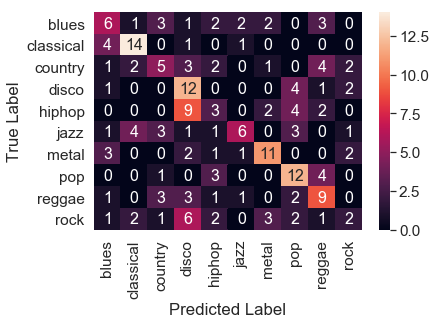

In [12]:
# Confusion Matrix
import seaborn as sn
genres = df["genre"].unique()
cmx = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cmx,genres,genres)
sn.set(font_scale = 1.4)
sn.heatmap(df_cm, annot = True, annot_kws = {"size": 16})
plt.ylabel('True Label')
plt.xlabel('Predicted Label')